In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Model parameteres
ms = 50.
g =9.81 #m/s2
rho = 1.091 #kg/m^3
r = 0.5 #m
A = numpy.pi*r**2
ue = 325. #m/s
Cd = 0.15
mp = 100. #kg
mpdot = 20. #burn rate

#Initial conditions
h0 = 0. #initial height
v0 =0.  #initial velocity


In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]

    return numpy.array([v,-g +(mpdot*ue)/(ms+mp) - \
                        (0.5*rho*v*abs(v)*A*Cd)/(ms +mp)])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

We know that until 5 seconds the burn rate is 20kg/s. Starting from 5 seconds, it drops to 0.

In [5]:
T = 40.   
dt =0.1
N = int(T/dt)+1  
t = numpy.linspace(0.0,T,N) 
u = numpy.empty((N,2))
u[0] = numpy.array([h0,v0])

In [6]:
for n in range(N-1):
    mp=mp-(mpdot*dt)
    if (n*dt>4.99):
        mp = 0
        mpdot =0
    print(mp)
    u[n+1]=euler_step(u[n], f, dt)

98.0
96.0
94.0
92.0
90.0
88.0
86.0
84.0
82.0
80.0
78.0
76.0
74.0
72.0
70.0
68.0
66.0
64.0
62.0
60.0
58.0
56.0
54.0
52.0
50.0
48.0
46.0
44.0
42.0
40.0
38.0
36.0
34.0
32.0
30.0
28.0
26.0
24.0
22.0
20.0
18.0
16.0
14.0
12.0
10.0
8.0
6.0
4.0
2.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [7]:
h= u[0:n,0]
v= u[0:n,1]
t= t[0:n]

In [8]:
for n in range(N):
    if (u[n+1,0])<0:
        flightend = n*dt
        print('flightend = %a' %flightend)
        endvelocity = (u[n+1,1])
        print('velocity at end of flight = %e' % endvelocity)
        break

flightend = 37.300000000000004
velocity at end of flight = -8.608238e+01


In [9]:
vmax =v.argmax()
maxvel = (v[vmax])
print('maximum velcoity is= %f' % maxvel)
timeofmaxvel = ((vmax+1)*dt)
print('Time when max velocity occurs %g secs' %timeofmaxvel)
print(h[vmax+1])

maximum velcoity is= 235.897189
Time when max velocity occurs 5.1 secs
556.643941108


1354.63079286
maximum height attained is = 1354.63079286
Time at max height = 15.9


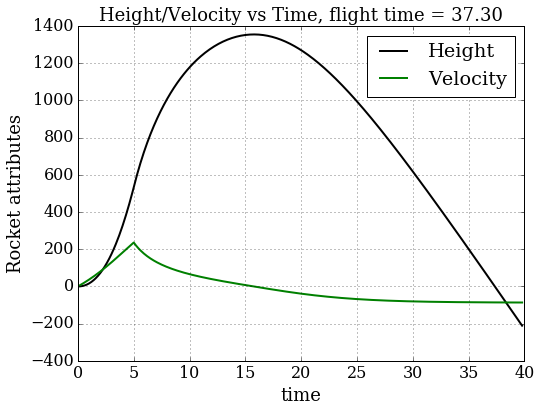

In [10]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'time', fontsize=18)
pyplot.ylabel(r'Rocket attributes', fontsize=18)
pyplot.xlim(0,T)
#pyplot.ylim(0, 1500)
pyplot.title('Height/Velocity vs Time, flight time = %.2f' % flightend, fontsize=18)
pyplot.plot(t,h, 'k-', lw=2);
pyplot.plot(t,v, 'g-', lw=2);
pyplot.legend(["Height", "Velocity"])
hmax = h.argmax()
maxh = h[hmax]
print(max(h))
print('maximum height attained is = %s'% maxh)
timeh = (hmax+1)*dt
print('Time at max height = %r' %timeh)